## Problem Description 🎞️
You're a data scientist working at Buzzfeed, one of your colleagues at the entertainment news team approached your boss as she is writing an article about the **movie evolution across the eras**.

👩‍💻 : Hey Alex, here's a TMDB movie dataset, could you dig up some interesting trends about movie evolution across the eras for me? Thanks. By the way, do you think we could discuss those insights tomorrow morning?

🧔🏻‍♂️ : No problem at all, I'll get Vivien to take a look for you.

**Challenged accepted!**

Take a deep dive into this dataset and come back with some findings for Alex 🧔🏻‍♂️ in the following format:
* 3 Python visualisations showcasing insights drawn from the data.
* 2 keypoints drawn from the data - explicitly stated in Markdown format and explained by your code & findings. What did you find most interesting? Or most surprising? Why is that?
* Select 2 movies on which to provide a more in-depth single observation analysis. Why have you selected these two? What's interesting about them? How do they compare to similar movies?

## Background 🕰️
 The movie eras are defined nicely in this article [Movie Eras - History of Cinema and the First Film](https://www.historyoffilm.net/movie-eras/history-of-cinema/)

## Goal 🍿

Present insights from the TMDB movie dataset using Exploratory Data Analysis.
* **How movie genre popularity changed throughout the eras.**
    * Number of genres.
    * Most popular genres.
* **Movie statistics throughout the eras**, e.g.
    * Budget.
    * Revenue.
    * Runtime.
* **Compare the 2 Highest Grossing movies.**


## Dataset 💿
* Derived and modified from [Kaggle TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv)

## Methodology 🧰
1. Data preparation
    * Examine data.
    * Data cleaning and transformation.
    * Feature engineering. 
2. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)

In [3]:
path = "./data/TMDB_movies.csv"

In [4]:
df = pd.read_csv(path)

## 1. Data Preparation 🧹

### 1.1 Examine Data
A first look at the data to:
* Understand the record format.
* Identify features to clean/drop.
* Identify features to engineer.

In [5]:
# View one record to understand its format
df.tail(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,"When ambitious New York attorney Sam is sent to Shanghai on assignment, he immediately stumbles into a legal mess that could end his career. With the help of a beautiful relocation specialist, a well-connected old-timer, a clever journalist, and a street-smart legal assistant, Sam might just save his job, find romance, and learn to appreciate the beauty and wonders of Shanghai. Written by Anonymous (IMDB.com).",0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""CN"", ""name"": ""China""}]",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 2249, ""name"": ""camcorder""}, {""id"": 9986, ""name"": ""crush""}, {""id"": 11223, ""name"": ""dream girl""}]",en,My Date with Drew,"Ever since the second grade when he first saw her in E.T. The Extraterrestrial, Brian Herzlinger has had a crush on Drew Barrymore. Now, 20 years later he's decided to try to fulfill his lifelong dream by asking her for a date. There's one small problem: She's Drew Barrymore and he's, well, Brian Herzlinger, a broke 27-year-old aspiring filmmaker from New Jersey.",1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87986}, {""name"": ""lucky crow films"", ""id"": 87987}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [6]:
# Look at column names, data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
# Look at statistics of numerical columns
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [9]:
print("Num. of missing values found per feature:")
df.isnull().sum()

Num. of missing values found per feature:


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [10]:
print("Num. of unique values found per feature:")
df.nunique().sort_values()

Num. of unique values found per feature:


status                     3
original_language         37
vote_average              71
runtime                  156
budget                   436
production_countries     469
spoken_languages         544
genres                  1175
vote_count              1609
homepage                1691
release_date            3280
revenue                 3297
production_companies    3697
tagline                 3944
keywords                4222
overview                4800
title                   4800
original_title          4801
popularity              4802
id                      4803
dtype: int64

### Summary of 1.1 First Look

Some interesting data format in these features:
* `genre`, `keywords`: consist of one or multiple key-value pairs with keys `id`,`name`.
* `production_companies`: consist of one or multiple key-value pairs with keys `id`,`name`.
* `production_countries`: consist of one of multiple key-value pairs with keys `iso_3166_1`,`name`. [ISO 3166-1](https://en.wikipedia.org/wiki/ISO_3166-1) is an international standard to define country code, the 2-letter country code is used here.
* `spoken_languages`: consist of multiple key-value pairs with keys `iso_639_1`,`name`.[ISO 639-1](https://en.wikipedia.org/wiki/ISO_639-1#:~:text=ISO%20639%2D1%3A2002%2C,registered%20as%20of%20June%202021.) is a 2-letter code used in international standards for defining languages.
* **Note**: There are empty lists in these features!

**Duplicate records**:
* None found.
  
**Missing data**:
* Found at `homepage`, `overview`, `release_date`, `runtime`, `tagline`.

**Erroneous data entry**:
* Some records contain zero values for `budget`, `runtime`, which doesn't seem likely since you'll need some budget to make a movie and a movie shouldn't have zero runtime!
* **Note** that I did not find zero values strange for `popularity`, `revenue`, `vote_count` and `vote_average` since all these are likely to happen: A movie did not make any money, is super unpopular and/or nobody voted for it.

**Categorical features**:
* So far we have identified `status` and `original_language`, there could be more once some feature engineering is done for those features with interesting data formats!

### 1.2 Data Cleaning and Transformation
* Drop columns with missing values in `homepage`, `overview`, `tagline` since I don't plan to use them for analysis.
* Drop rows with missing values in `release_date`, `runtime` since I wouldn't be able to analyse these rows.
* Transform `release_date` from `object` to `datetime` data type.
* Extract list of data from `genre`, `production_companies`, `production_countries`, `spoken_languages`. 

In [11]:
def count_na_rows(df):
    '''
    count the maximum numbers of rows with any missing value
    '''
    print(f"Total rows containing missing values: {df[df.isnull().any(axis=1)].count().max()}")
    print(f"Current TMDB dataset total rows: {df.shape[0]}")

In [12]:
print("Before dropping homepage, overview, tagline,")
count_na_rows(df)

Before dropping homepage, overview, tagline,
Total rows containing missing values: 3310
Current TMDB dataset total rows: 4803


In [13]:
df = df.drop(['homepage', 'overview', 'tagline'], axis=1)
print("After dropping homepage, overview, tagline,")
count_na_rows(df)

After dropping homepage, overview, tagline,
Total rows containing missing values: 3
Current TMDB dataset total rows: 4803


In [14]:
# drop any rows containing missing values
df = df.dropna(axis=0, how='any')
print("After dropping any rows containing missing values,")
count_na_rows(df)

After dropping any rows containing missing values,
Total rows containing missing values: 0
Current TMDB dataset total rows: 4800


In [15]:
df['release_date'] = pd.to_datetime(df['release_date'])
print(f"Dataset contain movies from year {df['release_date'].dt.year.min()} to {df['release_date'].dt.year.max()}.")

Dataset contain movies from year 1916 to 2017.


In [16]:
def get_values(s, key):
    '''
    convert string of list of dictionaries into list of dictionaries,
    and extract values using provided key  
    returns a list of values
    '''
    values_list = [kv_pairs[key].lower() for kv_pairs in ast.literal_eval(s)]
    return values_list

In [17]:
df['genres'] = df['genres'].map(lambda x: get_values(x, "name"))
df['production_companies'] = df['production_companies'].map(lambda x: get_values(x, "name"))
df['production_countries'] = df['production_countries'].map(lambda x: get_values(x, "iso_3166_1"))
df['spoken_languages'] = df['spoken_languages'].map(lambda x: get_values(x, "iso_639_1"))
df['keywords'] = df['keywords'].map(lambda x: get_values(x, "name"))

In [18]:
df = df.reset_index(drop=True)
df.tail(2)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4798,0,[],126186,[],en,Shanghai Calling,0.857008,[],"[us, cn]",2012-05-03,0,98.0,[en],Released,Shanghai Calling,5.7,7
4799,0,[documentary],25975,"[obsession, camcorder, crush, dream girl]",en,My Date with Drew,1.929883,"[rusty bear entertainment, lucky crow films]",[us],2005-08-05,0,90.0,[en],Released,My Date with Drew,6.3,16


### 1.3 Feature Engineering
* Get `release_year` and `movie_era` from `release_date`.
* Split up data into subsets by goal for separate analysis:
    * Goal: How movie genre popularity changed throughout the eras.
    * Goal: Movie statistics throughout the eras. 

In [19]:
def get_era(year):
    '''
    returns the movie era by year
    '''
    if year <= 1910:
        return "Pioneer Era"
    elif (year >= 1911) & (year <= 1926):
        return "Silent Era"
    elif (year >= 1927) & (year <= 1940):
        return "The Talkies"
    elif (year >= 1941) & (year <= 1954):
        return "The Golden Era"
    elif (year >= 1955) & (year <= 1976):
        return "The Change"
    elif (year >= 1977) & (year <= 1999):
        return "Dawn of Modern Era"
    else:
        return "New Millenium Era"

In [20]:
df['release_year'] = df['release_date'].dt.year
df['movie_era'] = df['release_year'].map(get_era)

Get a data subset `df_genre` for analysis on how movie genre popularity changed throughout the eras, and create multiple rows of movie-single genre. For those without genre, set `genre` as `unknown`

In [21]:
df_genre = df[['id', 'original_title', 'genres', 'release_date', 'release_year', 'movie_era', 'popularity', 'vote_average', 'vote_count']]
df_genre = df_genre.explode(column='genres')
df_genre

,id,original_title,genres,release_date,release_year,movie_era,popularity,vote_average,vote_count
0,19995,Avatar,action,2009-12-10,2009,New Millenium Era,150.437577,7.2,11800
0,19995,Avatar,adventure,2009-12-10,2009,New Millenium Era,150.437577,7.2,11800
0,19995,Avatar,fantasy,2009-12-10,2009,New Millenium Era,150.437577,7.2,11800
0,19995,Avatar,science fiction,2009-12-10,2009,New Millenium Era,150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,adventure,2007-05-19,2007,New Millenium Era,139.082615,6.9,4500
...,...,...,...,...,...,...,...,...,...
4797,231617,"Signed, Sealed, Delivered",drama,2013-10-13,2013,New Millenium Era,1.444476,7.0,6
4797,231617,"Signed, Sealed, Delivered",romance,2013-10-13,2013,New Millenium Era,1.444476,7.0,6
4797,231617,"Signed, Sealed, Delivered",tv movie,2013-10-13,2013,New Millenium Era,1.444476,7.0,6
4798,126186,Shanghai Calling,NaN,2012-05-03,2012,New Millenium Era,0.857008,5.7,7


In [22]:
print(f"df_genre duplicate row count: {df_genre.duplicated().sum()}")
print("df_genre missing values per feature:")
df_genre.isnull().sum()

df_genre duplicate row count: 0
df_genre missing values per feature:


id                 0
original_title     0
genres            27
release_date       0
release_year       0
movie_era          0
popularity         0
vote_average       0
vote_count         0
dtype: int64

In [23]:
df_genre['genres'] = df_genre['genres'].fillna("unknown")

Get a data subset `df_stats` for analysis on how movie statistics changed throughout the eras.

In [24]:
df_stats = df[['id', 'original_title', 'release_year', 'movie_era', 'budget', 'revenue', 'runtime', 'production_countries',
              'production_companies', 'spoken_languages']]
df_stats['gross_revenue'] = df_stats['revenue'] - df_stats['budget']
df_stats['revenue_million'] = df_stats['revenue'] / (10**6)
df_stats['budget_million'] = df_stats['budget'] / (10**6)

print("df_stats missing values per feature:")
df_stats.isnull().sum()

df_stats missing values per feature:


id                      0
original_title          0
release_year            0
movie_era               0
budget                  0
revenue                 0
runtime                 0
production_countries    0
production_companies    0
spoken_languages        0
gross_revenue           0
revenue_million         0
budget_million          0
dtype: int64

In [25]:
df_stats.head(2)

,id,original_title,release_year,movie_era,budget,revenue,runtime,production_countries,production_companies,spoken_languages,gross_revenue,revenue_million,budget_million
0,19995,Avatar,2009,New Millenium Era,237000000,2787965087,162.0,"[us, gb]","[ingenious film partners, twentieth century fox film corporation, dune entertainment, lightstorm entertainment]","[en, es]",2550965087,2787.965087,237.0
1,285,Pirates of the Caribbean: At World's End,2007,New Millenium Era,300000000,961000000,169.0,[us],"[walt disney pictures, jerry bruckheimer films, second mate productions]",[en],661000000,961.000000,300.0


## 2. Exploratory Data Analysis 🔎

### 2.1 How movie genres have evolved throughout the eras?
In a nutshell, movies evolution throughout the ages are defined by the following eras $^{[1]}$:
* 1895 to 1910 - The Pioneer Era
* 1911 to 1926 - The Silent Era
* 1927 to 1940 - Talkies and the rise of the Hollywood studios
* 1941 to 1954 - Golden Era of Film and restructuring of Hollywood
* 1955 to 1976 – The Change
* 1977 to 1999 – Dawn of the modern film industry and appearance of Blockbusters
* 2000 and beyond – New millennium

In [26]:
df_genre.movie_era.value_counts()

movie_era
New Millenium Era     8737
Dawn of Modern Era    2929
The Change             371
The Golden Era          83
The Talkies             61
Silent Era               4
Name: count, dtype: int64

**Notice that this dataset do not contain any movie information from the Pioneer Era.**

In [27]:
# define the movie evolution order by era from earliest to most recent, to be used in visualisation
evolution = ["Silent Era", "The Talkies", "The Golden Era", "The Change", "Dawn of Modern Era", "New Millenium Era"]

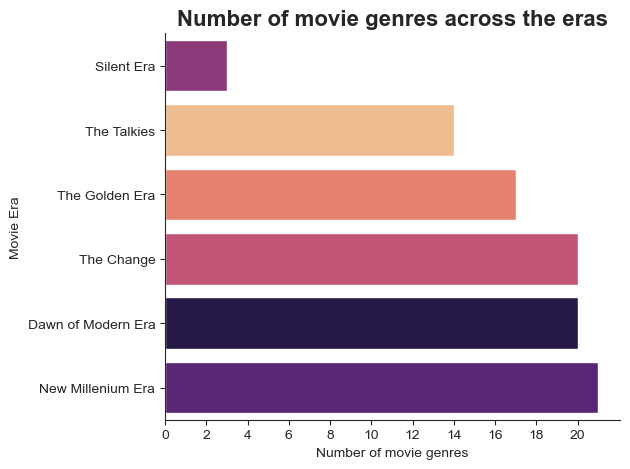

In [28]:
genre1 = df_genre.groupby(['movie_era', 'genres'])[['genres']].count()
genre1 = genre1.rename({'genres':'movie_count'}, axis=1)
genre1.reset_index(inplace=True)

with sns.axes_style("ticks"):
    sns.countplot(data=genre1, 
                  y='movie_era', 
                  order=evolution, 
                  hue='movie_era', palette='magma')
    sns.despine()
    plt.xticks(np.arange(0, 22, 2))
    plt.title("Number of movie genres across the eras", fontsize=16, fontweight="bold")
    plt.ylabel("Movie Era")
    plt.xlabel("Number of movie genres")
    plt.tight_layout()
    plt.show()

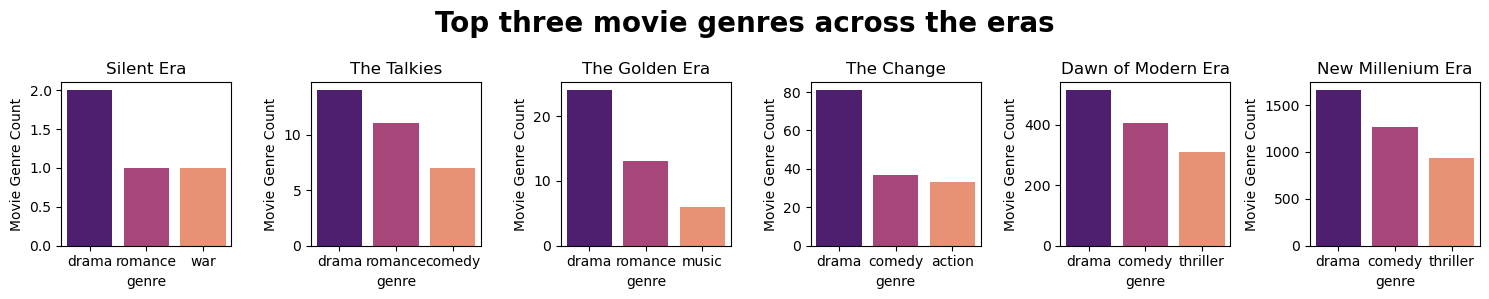

In [29]:
fig, ax = plt.subplots(1, len(evolution), figsize=(15,3))
fig.suptitle("Top three movie genres across the eras", fontsize=20, fontweight="bold")
for i,era in enumerate(evolution):
    data = genre1[genre1['movie_era'] == era].sort_values(by='movie_count', ascending=False)[:3]
    sns.barplot(data=data, 
                x='genres', 
                y='movie_count',
                hue='genres', palette='magma', ax=ax[i])
    ax[i].set_title(era)
    ax[i].set_xlabel("genre")
    ax[i].set_ylabel("Movie Genre Count")
plt.tight_layout()
plt.show()

### 2.1 Movie genre evolution through the eras
* Before dialogues are made possible in movies, there are only 3 genres during the Silent Era due to this limitation.
* Thanks to the technological advancement since The Talkies era, dialogues can be included in movie production. This have caused a massive increase in movie genres.
* Viewers of all eras love a good `Drama`. `Romance` used to be popular until the end of the Golden Era, but ever since CGI and special effects are getting popular in movie production, we saw genres such as `action` and `thriller` dominating the movie genres in the last 50 years.

### 2.2 Movie statistics throughout the eras
How these numbers have changed through time:
* Budget
* Revenue
* Runtime

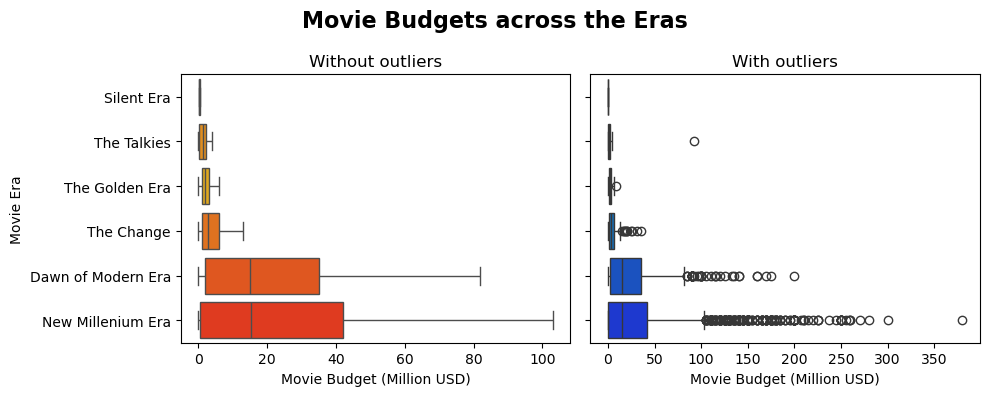

In [30]:
fig, ax = plt.subplots(1,2,figsize=(10,4), sharey=True)
fig.suptitle("Movie Budgets across the Eras", fontsize=16, fontweight="bold")
sns.boxplot(df_stats,  x='budget_million', y='movie_era', hue='movie_era',
            order=evolution, showfliers=False, palette='autumn', ax=ax[0])
sns.boxplot(df_stats,  x='budget_million', y='movie_era', hue='movie_era',
            order=evolution, showfliers=True, palette='winter', ax=ax[1])
ax[0].set_title("Without outliers")
ax[0].set_xlabel("Movie Budget (Million USD)")
ax[0].set_ylabel("Movie Era")
ax[1].set_title("With outliers")
ax[1].set_xlabel("Movie Budget (Million USD)")

plt.tight_layout()
plt.show()

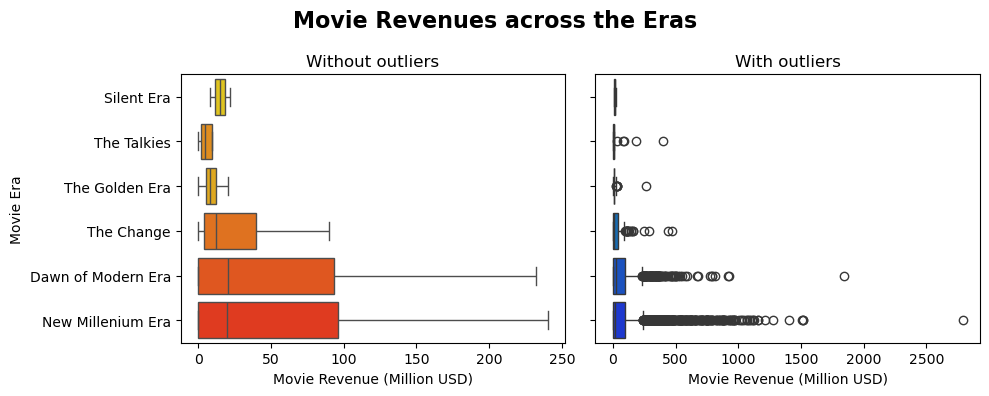

In [31]:
fig, ax = plt.subplots(1,2,figsize=(10,4), sharey=True)
fig.suptitle("Movie Revenues across the Eras", fontsize=16, fontweight="bold")
sns.boxplot(df_stats,  x='revenue_million', y='movie_era', hue='movie_era',
            order=evolution, showfliers=False, palette='autumn', ax=ax[0])
sns.boxplot(df_stats,  x='revenue_million', y='movie_era', hue='movie_era',
            order=evolution, showfliers=True, palette='winter', ax=ax[1])
ax[0].set_title("Without outliers")
ax[0].set_xlabel("Movie Revenue (Million USD)")
ax[0].set_ylabel("Movie Era")
ax[1].set_title("With outliers")
ax[1].set_xlabel("Movie Revenue (Million USD)")

plt.tight_layout()
plt.show()

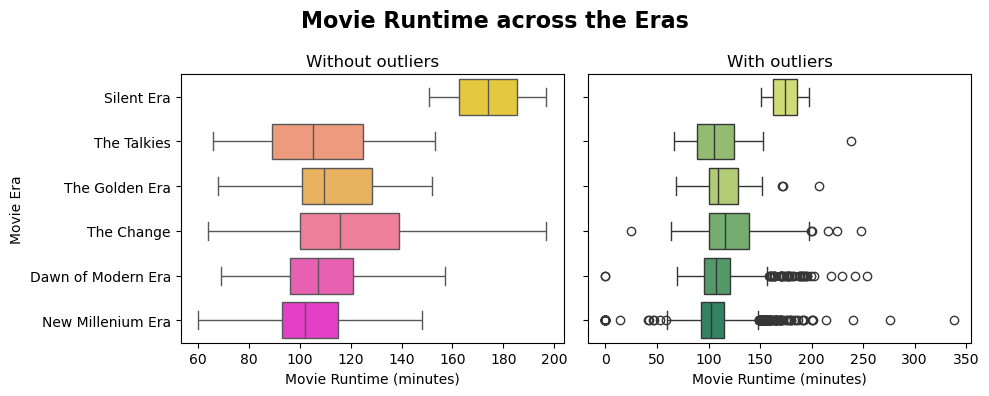

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10,4), sharey=True)
fig.suptitle("Movie Runtime across the Eras", fontsize=16, fontweight="bold")
sns.boxplot(df_stats,  x='runtime', y='movie_era', hue='movie_era',
            order=evolution, showfliers=False, palette='spring', ax=ax[0])
sns.boxplot(df_stats,  x='runtime', y='movie_era', hue='movie_era',
            order=evolution, showfliers=True, palette='summer', ax=ax[1])
ax[0].set_title("Without outliers")
ax[0].set_xlabel("Movie Runtime (minutes)")
ax[0].set_ylabel("Movie Era")
ax[1].set_title("With outliers")
ax[1].set_xlabel("Movie Runtime (minutes)")

plt.tight_layout()
plt.show()

### 2.2 Movie Statistics throughout the eras
**Budgets v.s. Revenues**
* We saw a much larger spread in budget and revenue for the Modern Era and New Millenium Era compared to what was before, **why is that**?
    * According to Investopedia$^{[2]}$, **majority of the costs goes to production costs**. Depending on the movie, post-production costs can be quite high as well. This is especially true with the movies with special effects and music production. The need to innovate begun in the Change Era as they need to compete with TV productions for ticket sales revenue.
    * What's also interesting is **how the source of revenue have changed throughout the eras**. Up until the Golden Era, it was heavily reliant on ticket sales and TV isn't common amongst households. When TV becoming common, they started selling TV rights and tape releases. Merchandising became a new source of revenue since Star Wars$^{[3]}$ in the Dawn of Modern Era. Now, video-on-demand and streaming are also a source of revenue for these companies.

**Runtime**  
* If we ignore the outliers, the runtime spread actually became narrower over the eras.
* Taking in the outliers, movies actually are getting longer, mostly due to the increase in special effects to produce a better storytelling experience. 
* The longest movie ever made in this dataset is as follow: 

In [33]:
print("Longest movie ever made:")
df_stats[df_stats.runtime == df_stats.runtime.max()][['original_title', 'runtime', 'budget_million', 'revenue_million', 'gross_revenue']]

Longest movie ever made:


,original_title,runtime,budget_million,revenue_million,gross_revenue
2384,Carlos,338.0,18.0,0.871279,-17128721


### 2.3 Compare the 2 Highest Grossing movies.
Gross revenue is the net revenue after minus budget from revenue.

In [34]:
df_stats.sort_values(by='gross_revenue', ascending=False)[:2]

,id,original_title,release_year,movie_era,budget,revenue,runtime,production_countries,production_companies,spoken_languages,gross_revenue,revenue_million,budget_million
0,19995,Avatar,2009,New Millenium Era,237000000,2787965087,162.0,"[us, gb]","[ingenious film partners, twentieth century fox film corporation, dune entertainment, lightstorm entertainment]","[en, es]",2550965087,2787.965087,237.0
25,597,Titanic,1997,Dawn of Modern Era,200000000,1845034188,194.0,[us],"[paramount pictures, twentieth century fox film corporation, lightstorm entertainment]","[en, fr, de, sv, it, ru]",1645034188,1845.034188,200.0


In [35]:
df_stats.sort_values(by='revenue', ascending=False)[:2]

,id,original_title,release_year,movie_era,budget,revenue,runtime,production_countries,production_companies,spoken_languages,gross_revenue,revenue_million,budget_million
0,19995,Avatar,2009,New Millenium Era,237000000,2787965087,162.0,"[us, gb]","[ingenious film partners, twentieth century fox film corporation, dune entertainment, lightstorm entertainment]","[en, es]",2550965087,2787.965087,237.0
25,597,Titanic,1997,Dawn of Modern Era,200000000,1845034188,194.0,[us],"[paramount pictures, twentieth century fox film corporation, lightstorm entertainment]","[en, fr, de, sv, it, ru]",1645034188,1845.034188,200.0


In [36]:
df_genre.loc[df_genre.id == 19995, 'genres'].str.cat(sep=',')

'action,adventure,fantasy,science fiction'

In [37]:
df_genre.loc[df_genre.id == 597, 'genres'].str.cat(sep=',')

'drama,romance,thriller'

### 2.3 Compare the 2 Highest Grossing movies.

The 2 Highest Grossing movies are Avatar and Titanic.

* **Similarities**:
    * Both topped the 2 highest revenue and gross revenue.
    * Both directed by James Cameron.
    * Both produced by 20th Century Fox and Lighstorm Entertainment.
    * Both used a ton of CGI in production.
    * Both won `Best Visual Effects` and `Best Cinematography` at the Oscars.

* **Differences**:
    * Their movie genres do not overlap.

## Summary ∑
**The movie evolution are closely tied to the technology advancements**:
* The ability to capture dialogues and sounds enriched the movie genres that could be produced.
* The birth of TV pushed for innovation due to the need to out-compete TV productions.
* Selling TV rights helped to retain classics on screen till date.
* The use of CGI and special effects pushed for more budget in movie productions, and in turn, drew more viewers to cinemas with top notch sound systems and equipped with special viewing effects such as 3D movies and IMAX.
* The internet killed the DVD businesses but brought in video-on-demand and streaming services.

## References 📚
* [1] History of Film.net: [Movie Eras - History of Cinema and the First Film](https://www.historyoffilm.net/movie-eras/history-of-cinema/)
* [2] Investopedia:[Why Movies Cost So Much to Make](https://www.investopedia.com/financial-edge/0611/why-movies-cost-so-much-to-make.aspx#:~:text=Hollywood%20is%20a%20big%20business,and%20special%20effects%2C%20and%20marketing.)
* [3] Investopedia: [How Exactly Do Movies Make Money?](https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp#:~:text=Ever%20since%20Star%20Wars%2C%20merchandising,of%20income%20for%20movie%20studios.)